In [1]:
using Plots

In [2]:
using PyCall

In [3]:
@pyimport scipy.special as sp

In [4]:
pyplot()

Plots.PyPlotBackend()

In [5]:
Plots.scalefontsizes(1.5)

In [6]:
using LaTeXStrings

In [7]:
include("cavitymethod.jl")

rho_bouchaud_population (generic function with 1 method)

In [8]:
function meanK(ene, beta)
    exp(ene*beta)*sp.hyp2f1(1.,1/beta, 1+1/beta, -exp(ene*beta))
end

meanK (generic function with 1 method)

In [9]:
function rho_barrat_cinfty(lambda, c, T, Np, ensemble, nsteps, epsilon2)
    beta = 1./T
    res = zeros(ensemble);
    dist_energy = Exponential()
    obar = zeros(Complex{Float64},c)
    el = zeros(c)
    for i in 1:c
        e1 = rand(dist_energy)
        el[i] = e1
        K = meanK(e1, beta)
        obar[i] =  im*(lambda-epsilon2*im)*exp(beta*e1)*c + c*im*K
    end
    e1 = rand(dist_energy)
    #el = rand(dist_energy,c)
    K = K_sym(e1, beta, el)
    omega_cm1 = im*(lambda-epsilon*im)*exp(beta*e1)*c + sum(im*obar.*K./(im*K .+ obar))
    res[1] = real(exp(beta*e1)*c/omega_cm1)
    
    for j in 2:ensemble
        for i in 1:c
            e1 = rand(dist_energy)
            el[i] = e1
            K = meanK(e1, beta)
            obar[i] =  im*(lambda-epsilon2*im)*exp(beta*e1)*c + c*im*K
        end
        e1 = rand(dist_energy)
       # el = rand(dist_energy,c)
        K = K_sym(e1, beta, el)
        omega_cm1 = im*(lambda-epsilon*im)*exp(beta*e1)*c + sum(im*obar.*K./(im*K .+ obar))
        res[j] = real(exp(beta*e1)*c/omega_cm1)
    end
    mean(res)*1/pi
end


rho_barrat_cinfty (generic function with 1 method)

In [10]:
function rho_barrat_2nd(lambda, c, T, Np, ensemble, nsteps, epsilon2)
    beta = 1./T
    poparray = init_array(Np)
    res = zeros(ensemble);
    dist_energy = Exponential()
    os = zeros(Complex{Float64}, c)
    for i in 1:c
        e1 = rand(dist_energy)
        K = meanK(e1, beta)
        os[i] =  im*(lambda-epsilon2*im)*exp(beta*e1)*c + c*im*K
    end
     energies = rand(dist_energy, c)
     e1 = rand(dist_energy)
     Kij = K_sym(e1, beta, energies)
    omega_cm1 =  im*(lambda-epsilon2*im)*exp(beta*e1)*c + sum(im*(Kij.*os)./(im*(Kij) .+ os))
    res[1] = real(exp(beta*e1)*c/omega_cm1)
    
    for j in 2:ensemble
        for i in 1:c
           e1 = rand(dist_energy)
            K = meanK(e1, beta)
            os[i] =  im*(lambda-epsilon2*im)*exp(beta*e1)*c + c*im*K
        end
         energies = rand(dist_energy, c)
         e1 = rand(dist_energy)
         Kij = K_sym(e1, beta, energies)
        omega_cm1 =  im*(lambda-epsilon2*im)*exp(beta*e1)*c + sum(im*(Kij.*os)./(im*(Kij) .+ os))
        res[j] = real(exp(beta*e1)*c/omega_cm1)
    end
    mean(res)*1/pi
end

rho_barrat_2nd (generic function with 1 method)

In [29]:
Np = 2500
nsteps = 25000
epsilon = 1.e-300
epsilon2 = 1.e-5
ensemble = Int64(10^5);
c = 5;
T = 0.1;

In [30]:
#lambda_barrat = -linspace(0.,1.,101);
lambda_barrat = -logspace(-4.,-1.,201);

In [34]:
rho_infty = [rho_barrat_cinfty(lambda, c, T, Np, ensemble, nsteps, epsilon2) for lambda in lambda_barrat];

In [35]:
#rho_2nd = [rho_barrat_2nd(lambda, c, T, Np, ensemble, nsteps, epsilon2) for lambda in lambda_barrat];

In [36]:
rho_ba = [rho_barrat_population(i, c, T, Np, ensemble, nsteps, epsilon, epsilon2) for i in lambda_barrat];

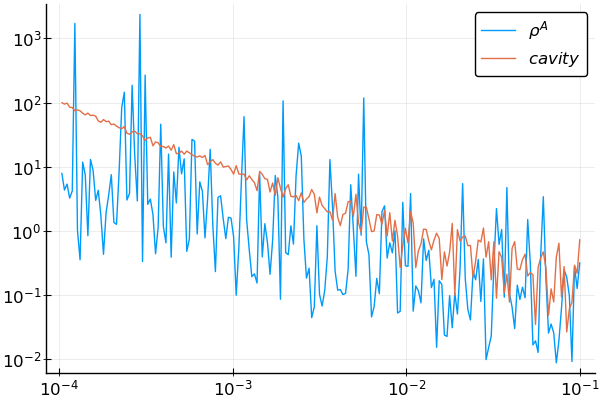

In [37]:
plot(-lambda_barrat[2:end], rho_infty[2:end], label = L"\rho^A", xscale = :log10, yscale = :log10)
plot!(-lambda_barrat[2:end], rho_ba[2:end], label = L"cavity")

In [21]:
Np = 2500
nsteps = 25000
epsilon = 1.e-300
epsilon2 = 1.e-5
ensemble = Int64(10^5);
c = 5;
T = 3.;

In [22]:
lambda_barrat = -logspace(-4.,0.,101);

In [24]:
rho_infty2 = [rho_barrat_cinfty(lambda, c, T, Np, ensemble, nsteps, epsilon2) for lambda in lambda_barrat];

In [25]:
rho_ba2 = [rho_barrat_population(i, c, T, Np, ensemble, nsteps, epsilon, epsilon2) for i in lambda_barrat];

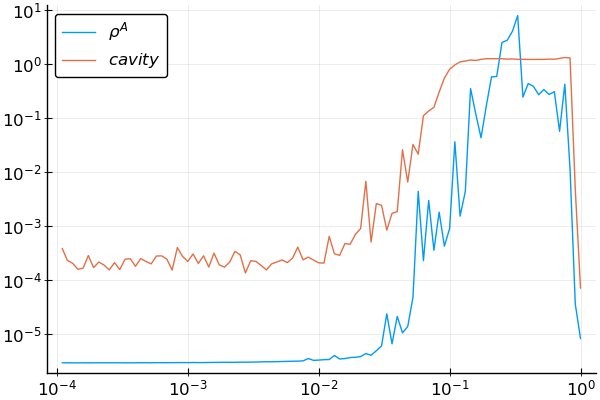

In [26]:
plot(-lambda_barrat[2:end], rho_infty2[2:end], label = L"\rho^A", xscale = :log10, yscale = :log10)
plot!(-lambda_barrat[2:end], rho_ba2[2:end], label = L"cavity")

In [38]:
Np = 2500
nsteps = 25000
epsilon = 1.e-300
epsilon2 = 1.e-5
ensemble = Int64(10^5);
c = 5;
T = 1.;

In [39]:
rho_infty3 = [rho_barrat_cinfty(lambda, c, T, Np, ensemble, nsteps, epsilon2) for lambda in lambda_barrat];

In [40]:
rho_ba3 = [rho_barrat_population(i, c, T, Np, ensemble, nsteps, epsilon, epsilon2) for i in lambda_barrat];

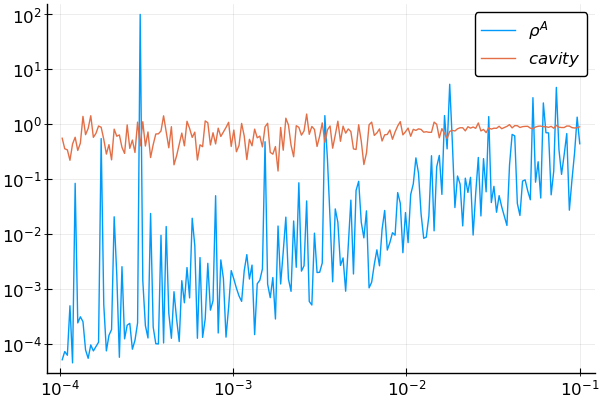

In [41]:
plot(-lambda_barrat[2:end], rho_infty3[2:end], label = L"\rho^A", xscale = :log10, yscale = :log10)
plot!(-lambda_barrat[2:end], rho_ba3[2:end], label = L"cavity")